# Regression

This example demonstrates various Regressor methods. We will use the Winequality dataset.

In [55]:
from vertica_ml_python.learn.datasets import load_winequality
winequality = load_winequality()
print(winequality)

,volatile_acidity,citric_acid,fixed_acidity,free_sulfur_dioxide,density,good,quality,chlorides,alcohol,color,pH,total_sulfur_dioxide,sulphates,residual_sugar
0,0.3100,0.020,3.800,20.00,0.99248,0,6,0.036,12.4,white,3.750,114.00,0.440,11.100
1,0.2250,0.400,3.900,29.00,0.989,1,8,0.03,12.8,white,3.570,118.00,0.360,4.200
2,0.1700,0.360,4.200,93.00,0.98999,1,7,0.029,12.0,white,3.650,161.00,0.890,1.800
3,0.2150,0.230,4.200,64.00,0.99688,0,3,0.041,8.0,white,3.420,157.00,0.440,5.100
4,0.3200,0.390,4.400,31.00,0.98904,1,8,0.03,12.8,white,3.460,127.00,0.360,4.300
,...,...,...,...,...,...,...,...,...,...,...,...,...,...


<object>  Name: winequality, Number of rows: 6497, Number of columns: 14


Let's create a Linear Regression to predict the Wine Quality.

In [65]:
from vertica_ml_python.learn.linear_model import LinearRegression
model = LinearRegression("public.LR_winequality")
model.fit("public.winequality", ["alcohol"], "quality")



details
predictor|coefficient|std_err |t_value |p_value 
---------+-----------+--------+--------+--------
Intercept|  2.40527  | 0.08594|27.98758| 0.00000
 alcohol |  0.32531  | 0.00814|39.97052| 0.00000


regularization
type| lambda 
----+--------
none| 1.00000


call_string
linear_reg('public.LR_winequality', 'public.winequality', '"quality"', '"alcohol"'
USING PARAMETERS optimizer='newton', epsilon=0.0001, max_iterations=100, regularization='none', lambda=1, alpha=0.5)

Additional Info
       Name       |Value
------------------+-----
 iteration_count  |  1  
rejected_row_count|  0  
accepted_row_count|6497 

Fitting the model creates new model attributes, which make methods easier to use.

In [66]:
model.X

['"alcohol"']

In [59]:
model.y

'"quality"'

In [60]:
model.input_relation

'public.winequality'

In [61]:
model.test_relation

'public.winequality'

In our case, we did not write the test relation when fitting the model. The model will then consider the training relation as test. These attributes will be used when invoking the different model abstractions. For example, let's compute the R2 of the model.

In [67]:
model.score(method = "r2")

0.197418947221801

The 'score' method is using the attribute 'y' and the model prediction in the 'test_relation' to compute the accuracy. You can change these at anytime to deploy the models on different columns. The model could also have other useful attributes. In this case, the 'coef' attribute provides us with useful information.

In [68]:
model.coef

,predictor,coefficient,std_err,t_value,p_value
0,Intercept,2.40526860155643,0.0859405708614019,27.9875799921722,7.70494206960017e-163
1,alcohol,0.325312038053532,0.00813879966075786,39.97051796496,1.496509342493e-312


<object>

Let's look at the generated SQL code.

In [69]:
print(model.deploySQL())

PREDICT_LINEAR_REG("alcohol" USING PARAMETERS model_name = 'public.LR_winequality', match_by_pos = 'true')


The best way to evaluate your model is with the regression report.

In [70]:
model.regression_report()

,value
explained_variance,0.197418947221787
max_error,3.50420028103093
median_absolute_error,0.495799718969066
mean_absolute_error,0.618753622791325
mean_squared_error,0.611933859491369
r2,0.197418947221801


<object>

You can also add the prediction to your vDataFrame (The method 'predict' is only possible for built-in algorithms, the method 'to_vdf' is a way to replace it when the implementation is not possible). Do not forget to change the 'X' attribute if the columns names differ.

In [71]:
model.predict(winequality, name = "pred_quality")

,volatile_acidity,citric_acid,fixed_acidity,free_sulfur_dioxide,density,good,quality,chlorides,alcohol,color,pH,total_sulfur_dioxide,sulphates,residual_sugar,pred_quality
0,0.3100,0.020,3.800,20.00,0.99248,0,6,0.036,12.4,white,3.750,114.00,0.440,11.100,6.43913787342023
1,0.2250,0.400,3.900,29.00,0.989,1,8,0.03,12.8,white,3.570,118.00,0.360,4.200,6.56926268864164
2,0.1700,0.360,4.200,93.00,0.98999,1,7,0.029,12.0,white,3.650,161.00,0.890,1.800,6.30901305819881
3,0.2150,0.230,4.200,64.00,0.99688,0,3,0.041,8.0,white,3.420,157.00,0.440,5.100,5.00776490598469
4,0.3200,0.390,4.400,31.00,0.98904,1,8,0.03,12.8,white,3.460,127.00,0.360,4.300,6.56926268864164
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


<object>  Name: winequality, Number of rows: 6497, Number of columns: 15

The vDataFrame has also a method 'score' to do model evaluation.

In [73]:
winequality.score("quality", "pred_quality", method = "mse")

0.611933859491364

Examine your prediction.

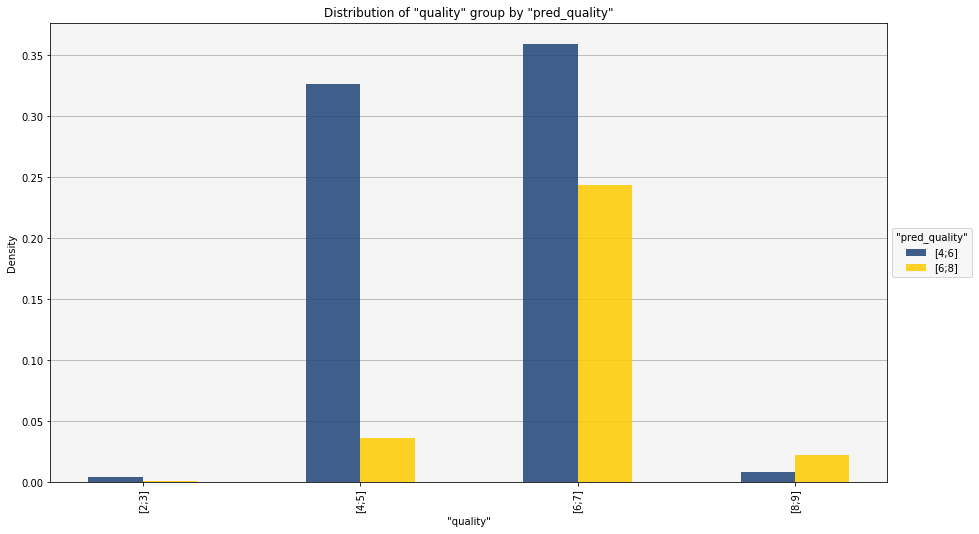

In [77]:
winequality.hist(["quality", "pred_quality"], h = (2, 2))

Some Regressors can be drawn.

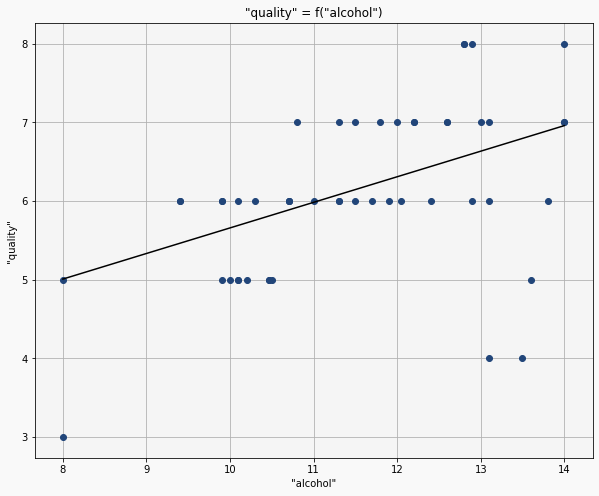

In [79]:
model.plot()